In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# import sci-kit learn as sklearn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Retail_Transaction_Dataset.csv to Retail_Transaction_Dataset.csv


In [ ]:
retail = pd.read_csv('Retail_Transaction_Dataset.csv')
retail.head(20)

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
5,463050,D,3,54.093152,8/15/2023 4:24,Cash,"8492 Jonathan Drive\nNorth Robertshire, TN 67532",Electronics,10.888768,144.609223
6,888163,D,7,13.121937,12/26/2023 5:32,PayPal,USNV Harrell\nFPO AA 62814,Clothing,16.295127,76.885907
7,843385,A,8,56.025164,10/11/2023 6:48,Debit Card,"489 Juan Loop Apt. 093\nNorth Brettville, WV 7...",Home Decor,6.344306,419.766052
8,839609,B,5,23.857981,2/27/2024 11:13,Credit Card,528 Justin Expressway Apt. 336\nCabreraborough...,Electronics,18.703997,96.977925
9,184135,D,4,63.342777,11/5/2023 1:46,Debit Card,"189 Wright Mews\nMartinfurt, MO 75932",Books,7.640607,234.012018


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [ ]:
retail['TransactionDate'] = pd.to_datetime(retail['TransactionDate'])

In [ ]:
retail.describe()

,CustomerID,Quantity,Price,TransactionDate,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,2023-10-29 15:40:05.471399936,10.020155,248.334955
min,14.000000,1.000000,10.000430,2023-04-29 22:27:00,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,2023-07-30 06:45:15,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,2023-10-30 05:12:30,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,2024-01-29 05:44:00,15.018367,362.009980
max,999997.000000,9.000000,99.999284,2024-04-28 22:22:00,19.999585,896.141242
std,288460.917524,2.579808,25.971567,NaN,5.779534,184.554792


In [ ]:
retail.isnull().sum()

,0
CustomerID,0
ProductID,0
Quantity,0
Price,0
TransactionDate,0
PaymentMethod,0
StoreLocation,0
ProductCategory,0
DiscountApplied(%),0
TotalAmount,0


In [ ]:
retail.duplicated().sum()

np.int64(0)

In [ ]:
# prompt: I want to create a column for only years from the date column and also a month column

retail['Year'] = retail['TransactionDate'].dt.year
retail['Month'] = retail['TransactionDate'].dt.month

retail.head()
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
 10  Year                100000 non-null  int32         
 11  Month               100000 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(4)
memory usage: 8.4+ MB


In [ ]:
retail.head(10)

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,Year,Month
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,2023,12
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546,2023,8
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651,2024,3
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769,2023,10
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484,2023,12
5,463050,D,3,54.093152,2023-08-15 04:24:00,Cash,"8492 Jonathan Drive\nNorth Robertshire, TN 67532",Electronics,10.888768,144.609223,2023,8
6,888163,D,7,13.121937,2023-12-26 05:32:00,PayPal,USNV Harrell\nFPO AA 62814,Clothing,16.295127,76.885907,2023,12
7,843385,A,8,56.025164,2023-10-11 06:48:00,Debit Card,"489 Juan Loop Apt. 093\nNorth Brettville, WV 7...",Home Decor,6.344306,419.766052,2023,10
8,839609,B,5,23.857981,2024-02-27 11:13:00,Credit Card,528 Justin Expressway Apt. 336\nCabreraborough...,Electronics,18.703997,96.977925,2024,2
9,184135,D,4,63.342777,2023-11-05 01:46:00,Debit Card,"189 Wright Mews\nMartinfurt, MO 75932",Books,7.640607,234.012018,2023,11


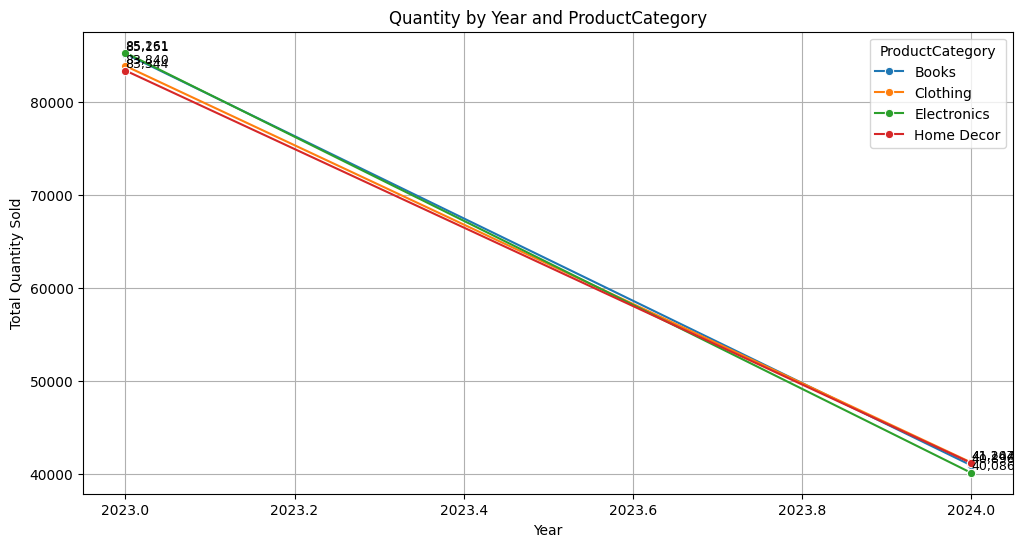

In [ ]:
# prompt: now i want to plot a line chart with productcategory by year. use productcategory as legend and add data labels

import matplotlib.pyplot as plt
# Aggregate data by Year and ProductCategory
yearly_sales = retail.groupby(['Year', 'ProductCategory'])['Quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=yearly_sales, x='Year', y='Quantity', hue='ProductCategory', marker='o')
plt.title('Quantity by Year and ProductCategory')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.grid(True)

# Add data labels
for line in lineplot.get_lines():
    x, y = line.get_data()
    for i in range(len(x)):
        plt.text(x[i], y[i], f'{y[i]:,.0f}', fontsize=9, ha='left', va='bottom')

plt.show()

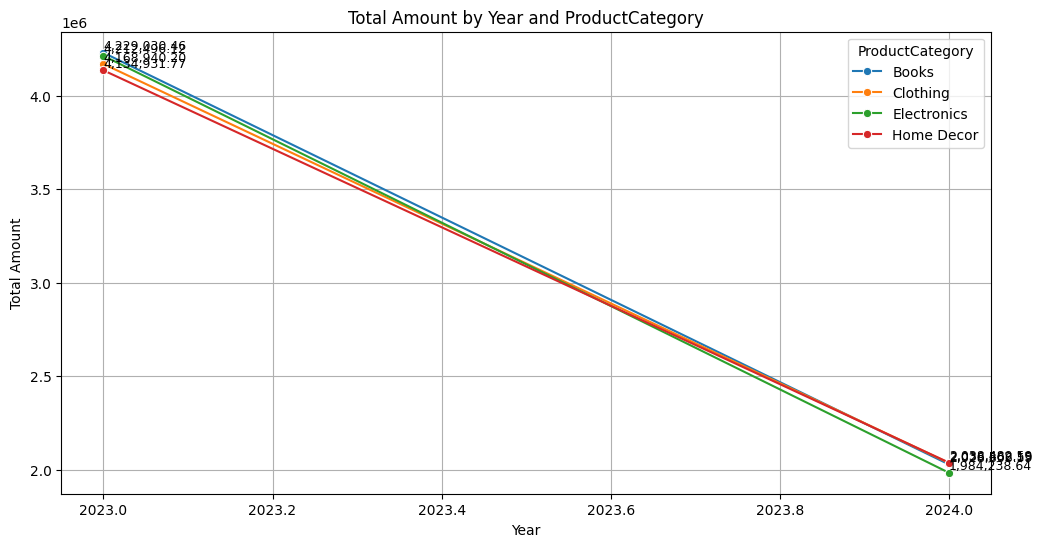

In [ ]:
# prompt: Now i want to plot productcategory by Total amount using productcategory as legend and add labels to the amounts over the years

import matplotlib.pyplot as plt
# Aggregate data by Year and ProductCategory for Total Amount
yearly_amount = retail.groupby(['Year', 'ProductCategory'])['TotalAmount'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=yearly_amount, x='Year', y='TotalAmount', hue='ProductCategory', marker='o')
plt.title('Total Amount by Year and ProductCategory')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.grid(True)

# Add data labels
for line in lineplot.get_lines():
    x, y = line.get_data()
    for i in range(len(x)):
        plt.text(x[i], y[i], f'{y[i]:,.2f}', fontsize=9, ha='left', va='bottom')

plt.show()


In [ ]:

# For time series
!pip install prophet
from prophet import Prophet

# For optimization
from scipy.optimize import linprog

# For model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:


# Filter relevant columns
reg_data = retail[['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount']].dropna()

In [ ]:
reg_data.head()


,Quantity,Price,DiscountApplied(%),TotalAmount
0,7,80.079844,18.677100,455.862764
1,4,75.195229,14.121365,258.306546
2,8,31.528816,15.943701,212.015651
3,5,98.880218,6.686337,461.343769
4,7,93.188512,4.030096,626.030484


In [ ]:
X = reg_data[['Quantity', 'Price', 'DiscountApplied(%)']]
y = reg_data['TotalAmount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Model summary
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [49.36563179  4.5119461  -2.70472288]
Intercept: -220.29443761390132


In [ ]:
#  Predict Quantity needed at $50 avg price and 25% discount
target_revenue = 50000000
price = 50
discount = 25

# Solve for Quantity:
# Revenue = a*Quantity + b*Price + c*Discount + intercept
a, b, c = model.coef_
intercept = model.intercept_

quantity_needed = (target_revenue - (b*price + c*discount + intercept)) / a
print("Estimated Quantity Needed:", round(quantity_needed))


Estimated Quantity Needed: 1012852


In [ ]:
monthly = retail.resample('M', on='TransactionDate').agg({'TotalAmount':'sum'}).reset_index()
monthly.columns = ['ds', 'y']
monthly.head()


<ipython-input-39-2186863258>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = retail.resample('M', on='TransactionDate').agg({'TotalAmount':'sum'}).reset_index()


,ds,y
0,2023-04-30,6.084079e+04
1,2023-05-31,2.099576e+06
2,2023-06-30,2.066365e+06
3,2023-07-31,2.132551e+06
4,2023-08-31,2.109353e+06


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzubscnp9/scwry8p8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzubscnp9/qsgttn6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25542', 'data', 'file=/tmp/tmpzubscnp9/scwry8p8.json', 'init=/tmp/tmpzubscnp9/qsgttn6c.json', 'output', 'file=/tmp/tmpzubscnp9/prophet_modelrxb3pmcu/prophet_model-20250616150045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:00:45 - cmdstanpy - INFO - Chain [1] start processing
IN

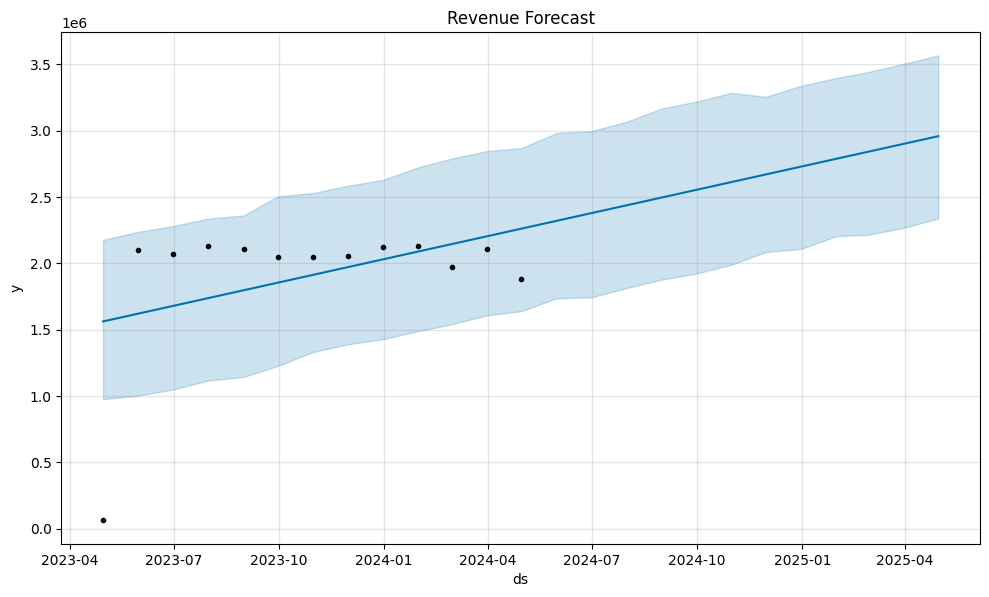

In [ ]:
model = Prophet()
model.fit(monthly)

# Forecast next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title("Revenue Forecast")
plt.show()


In [ ]:
# Example prices and max capacity (can be real values)
prices = np.array([30, 50, 40, 60])  # Books, Clothing, Electronics, Home Decor
category_labels = ['Books', 'Clothing', 'Electronics', 'Home Decor']

# Objective: maximize revenue = price * quantity
c = -prices  # Negative for maximization (linprog minimizes)

# Constraints
A_eq = [prices]
b_eq = [50000000]  # Total revenue target

# Quantity bounds (optional)
bounds = [(0, 500000), (0, 500000), (0, 500000), (0, 500000)]

res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

if res.success:
    print("Optimal Quantities to Reach $50M:")
    for cat, qty in zip(category_labels, res.x):
        print(f"{cat}: {round(qty)} units")
else:
    print("Optimization failed.")


Optimal Quantities to Reach $50M:
Books: 0 units
Clothing: 0 units
Electronics: 500000 units
Home Decor: 500000 units
